# chap7. 검증하고 예측하기

### z 점수(표준점수) 구하기

조건은 정규분포를 따라   
해당 점수가 평균으로부터 얼마나 떨어져 있는지

In [1]:
import numpy as np

In [3]:
x =[0, 3, 5, 7, 10]

s = np.std(x)
m = np.mean(x)
z = (7-m) / s
print(z)

0.5872202195147035


In [4]:
# 사이파이의 stats 모듈 zscore()함수 사용
# 코렙에서는 설치 못해
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

### 누적분포

In [5]:
#점수를 이용해 비율을 구하기
stats.norm.cdf(0) # 평균값을 전달

0.5

In [6]:
# 표준편자 1이내의 비율 구하기
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [7]:
# 비율을 이용해 점수를 구하기
stats.norm.ppf(0.9)

1.2815515655446004

---

## 중심극한 정리

정규분포가 아닌 왜곡이 있을 때   
무작위로 샘플을 뽑아 정규분포의 표본을 만들어줘

In [10]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)
# 다운로드할 대상, 내가 쓸 이름, False는 내가 지정한 이름을 사용하겠다.
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
# low_memory=False 필요한만큼 다 쓰겠다.
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\myPyCode\ns_book7.csv
100%|█████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:01<00:00, 34.6MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


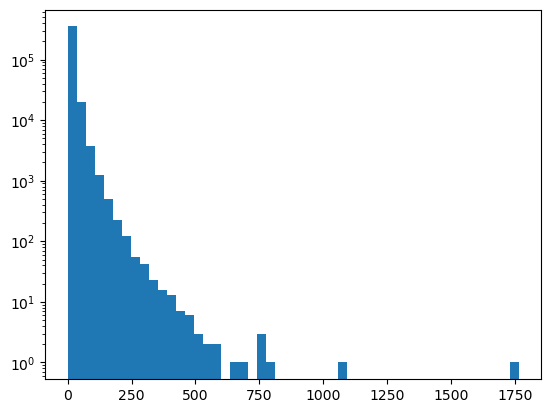

In [12]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'],bins=50)
plt.yscale('log')
plt.show()

In [14]:
# 1000개의 값을 샘플링해서 리스트에 append
# sample()판다스 함수
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean()
    sample_means.append(m)
# 반드시 표준정규분포는 아니야

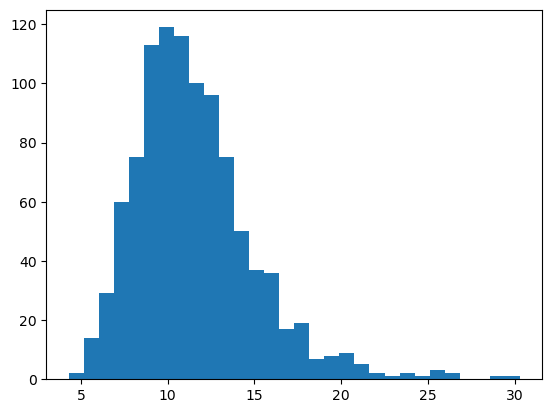

In [15]:
plt.hist(sample_means, bins=30)
plt.show()

샘플링 크기와 정확도 확인   
(샘플링했으면 반드시 확인하기!)


In [16]:
np.mean(sample_means)

11.539900000000001

In [17]:
ns_book7['대출건수'].mean()

11.593438968070707

일반적으로 중심극한 정리 따르려면 샘플링의 크기가 30보다 클수록 좋음   
그렇다고 100%맞는 건 아님! 실험해봐야 해

모집단이 정규분포를 따르지 않을 경우 위 공식이 안맞을 수도 있음

# 모집단의 평균 범위 추정하기: 신뢰구간

***실제 데이터 정규분포 따르지 않을 가능성이 높아!! 신뢰구간을 구해야 해***

In [21]:
python_books_index =  ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [22]:
len(python_books)

251

In [29]:
python_mean = np.mean(python_books['대출건수'])
python_mean

14.749003984063744

In [23]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
# 표본에 포함된 샘플 개수 루트
python_se

0.8041612072427442

95% 구간 구하기

In [25]:
stats.norm.ppf(0.975)

-1.9599639845400545

In [26]:
stats.norm.ppf(0.025)

-1.9599639845400545

In [30]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


***신뢰구간은 이 구간 안에 모집단의 평균이 포함되어 있을 것이라 확시하는 범위를 의미*** 

## 통계적 의미 확인하기: 가설검정

표본에 대한 정보를 사용해(모집단x)

ex)  
파이썬과 C++ 도서의  평균 대출건수가 같다는 가설 영가설 또는 귀무가설  
반대로 같지 않다 대립가설

In [34]:
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


### t-검정으로 가설 검증하기

In [35]:
# 파이썬 c++데이터 대출건수 같다
# t검정 ttest_ind()
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


## 정규분포가 아닐 때 가설 검증하기: 순열검정

In [40]:
# 순열검정을 위한 permutation_test() 사이파이1.8이상에서만 가능
res = stats.permutation_test((python_books['대출건수'], cplus_books['대출건수']), statistic, random_state=42)
print(res.statistic, res.pvalue)

3.1534983660862164 0.0258


In [36]:
#두 개의 배열을 받아 평균을 구하는 함수 구현
def statistic(x,y):
    return np.mean(x) - np.mean(y)

In [55]:
def permutation_test(x, y):
    # 표본의 평균 차이를 계산합니다.
    obs_diff = statistic(x, y)
    # 두 표본을 합칩니다.
    all = np.append(x, y)
    diffs = []
    np.random.seed(42)
    # 순열 검정을 1000번 반복합니다.
    for _ in range(1000):
        # 전체 인덱스를 섞습니다.
        idx = np.random.permutation(len(all))
        # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산합니다.
        x_ = all[idx[:len(x)]]
        y_ = all[idx[len(x):]]
        diffs.append(statistic(x_, y_))
    print((obs_diff))
    print(len(diffs))
    # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
    less_pvalue = np.sum(diffs < obs_diff)/1000
    greater_pvalue = np.sum(diffs > obs_diff)/1000
    # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p-값을 반환합니다.
    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2

In [59]:
def permutation_test(x, y):
    # 표본의 평균 차이를 계산합니다.
    obs_diff = statistic(x, y)
    # 두 표본을 합칩니다.
    all = np.append(x, y)
    diffs = []
    np.random.seed(42)
    # 순열 검정을 1000번 반복합니다.
    for _ in range(1000):
        # 전체 인덱스를 섞습니다.
        idx = np.random.permutation(len(all))
        # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산합니다.
        x_ = all[idx[:len(x)]]
        y_ = all[idx[len(x):]]
        diffs.append(statistic(x_, y_))
#     print((obs_diff))
#     print(len(diffs))
    # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
    less_pvalue = np.sum(i < obs_diff for i in diffs) / 1000
    greater_pvalue = np.sum(i > obs_diff for i in diffs) / 1000
    # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p-값을 반환합니다.
    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2

In [60]:
permutation_test(python_books['대출건수'], cplus_books['대출건수'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7232\2926251638.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  less_pvalue = np.sum(i < obs_diff for i in diffs) / 1000
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7232\2926251638.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  greater_pvalue = np.sum(i > obs_diff for i in diffs) / 1000


(3.1534983660862164, 0.022)